# Vasicek Interest Rate Model

A simple model for the stochastic simulation of interest rates. Shifts in rates are now correlated by using one model.
Rates should idealy be correlated using Cholesky decomposition. the Vasicek model is a simplified model that may not capture all the features of real-world interest rate dynamics.

https://www.investopedia.com/terms/v/vasicek-model.asp#:~:text=The%20term%20Vasicek%20Interest%20Rate,will%20move%20in%20the%20future.

In [5]:
from src.data import dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from src.models import predict
from pandas.tseries.offsets import BDay

In [29]:
zerocurve = dataset.Zerocurve()
zerocurve.load_data()
df_z = zerocurve.df
yield_data = df_z.pivot(columns = 'tenor', values = 'rate')

2023-03-16 15:51:21.521 | INFO     | src.data.dataset:read_data:141 - reading zero curve data from ESW.


In [52]:
yield_data = yield_data_copy.copy() 

c:\Users\M\miniconda3\envs\rlalm\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


<AxesSubplot:xlabel='rate_dt'>

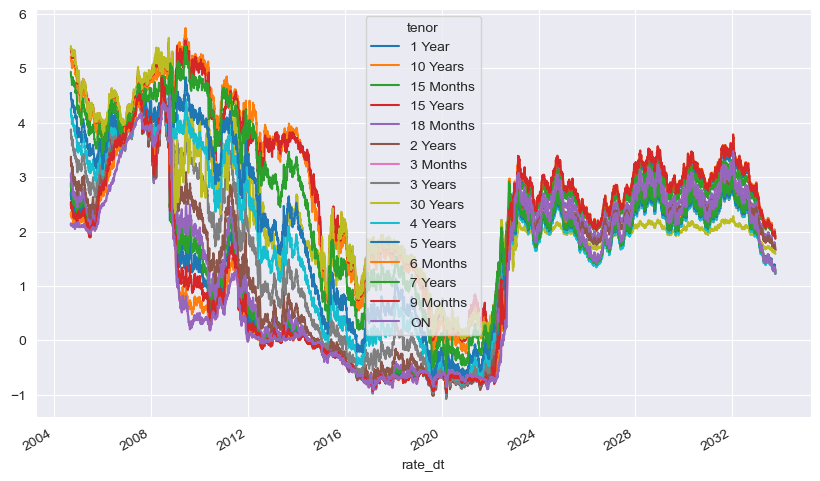

In [54]:
rate_changes = np.log(1 + yield_data.pct_change()).dropna()
mu = rate_changes.mean().values
sigma = rate_changes.std().values
T = 1 # time horizon
dt = 1 / 252  # 1 business day

for i in range(int(T/dt)):
    r0 = yield_data.iloc[-1].values
    next_day = yield_data.index[-1] + BDay(1)
    r1 = np.exp(predict.vasicek(np.log(r0), mu, sigma, dt)) # Exponentiate the predicted log return
    yield_data.loc[next_day] = r1
    
# yield_data.plot()



In [70]:
pd.melt(yield_data.reset_index(), id_vars = 'rate_dt')

,rate_dt,tenor,value
0,2004-09-06,1 Year,2.651565
1,2004-09-07,1 Year,2.700174
2,2004-09-08,1 Year,2.731688
3,2004-09-09,1 Year,2.662770
4,2004-09-10,1 Year,2.593700
...,...,...,...
112495,2033-10-07,ON,1.303209
112496,2033-10-10,ON,1.256320
112497,2033-10-11,ON,1.235818
112498,2033-10-12,ON,1.222737


<AxesSubplot:xlabel='rate_dt', ylabel='value'>

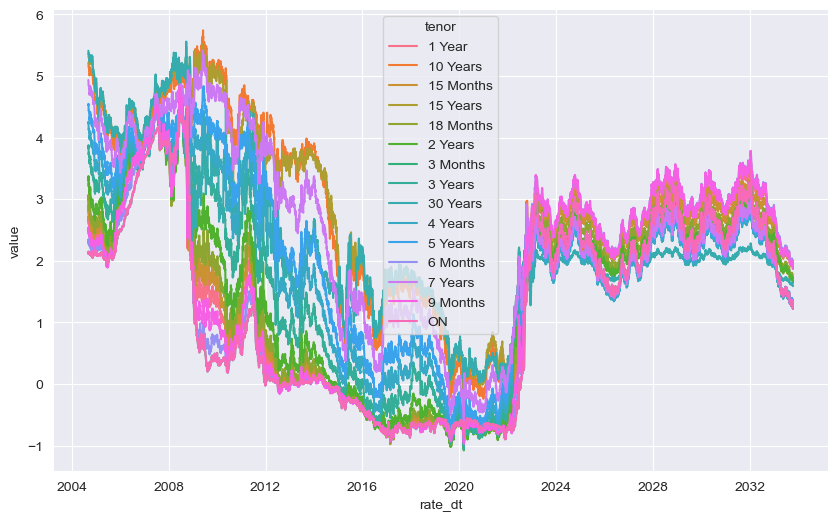

In [72]:

sns.lineplot(pd.melt(yield_data.reset_index(), id_vars = 'rate_dt'), x = 'rate_dt', y = 'value', hue = 'tenor')